In [ ]:
"""
TMN Simulation 
Last Update:2017-02-19
Date: 2017-02-10
Author: Lee Carlin
lee1carlin@gmail.com
"""

# TMN Simulations #

## Contents: ##

1. Univariate Truncation 
2. Bivariate Truncation
3. Correlated Bivariate Truncation

In [2]:
# Loading Modules:
import scipy.stats as ss
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline


We first generate a normal random variable and plot its pdf (left plot). Then we filter out values that are smaller then a speficied threshold and observe the resulting pdf (right plot):

## Univariate Truncation ## 

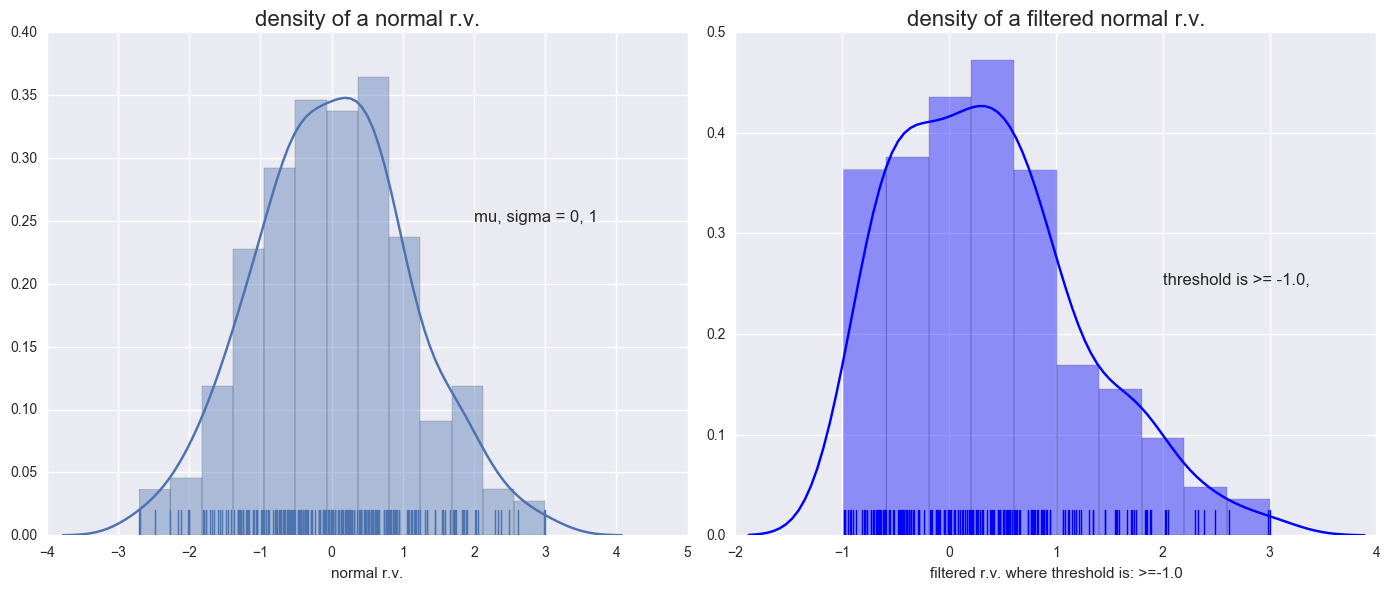

In [3]:
mu, sigma = 0, 1 # mean and standard deviation
sample_size = 250
x = np.random.normal(mu, sigma,size=sample_size) # Generating a sample from a nomral bivariate randome vairable

# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=False)
sns.despine(left=True)
# Plot a simple histogram and kernel density of a normal random variable
a= sns.distplot(x, hist=True, kde=True, rug=True, color=None,  
                axlabel='normal r.v.', ax=axes[0])
a.annotate('mu, sigma = 0, 1', xy=(2, 0.25), fontsize=12)
a.set_title('density of a normal r.v.', fontsize=16)
# Filter the generated normal sample by a threshold:
th = -1.0
y = np.array(filter(lambda a: a >= th, x)) # Filter the generated sample by a threshold
b= sns.distplot(y, hist=True, kde=True, rug=True, color='blue', 
                axlabel='filtered r.v. where threshold is: >={}'.format(th), ax=axes[1])
b.set_title('density of a filtered normal r.v.',fontsize=16)
b.annotate('threshold is >= {},'.format(th), xy=(2, 0.25), fontsize=12)
#f.suptitle('test title', fontsize=20)
plt.tight_layout()

## Bivariate Truncation ##

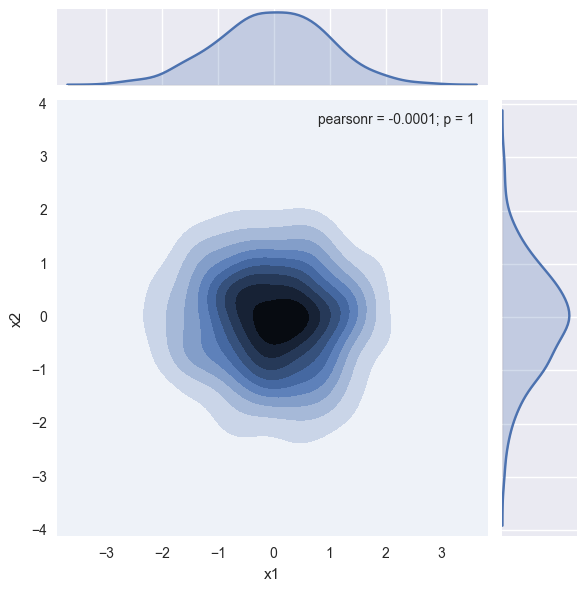

In [8]:
# Getting 
rho = 0
sample_size = 500
mean, cov = [0,0], [(1, rho), (rho, 1)]
data = np.random.multivariate_normal(mean, cov, sample_size)
df = pd.DataFrame(data, columns=["x1", "x2"])
sns.jointplot(x="x1", y="x2", data=df,kind="kde");


Defining a new statistic as the sum of the variates, and plotting the resulting pdf, with and without filtering a threshold:

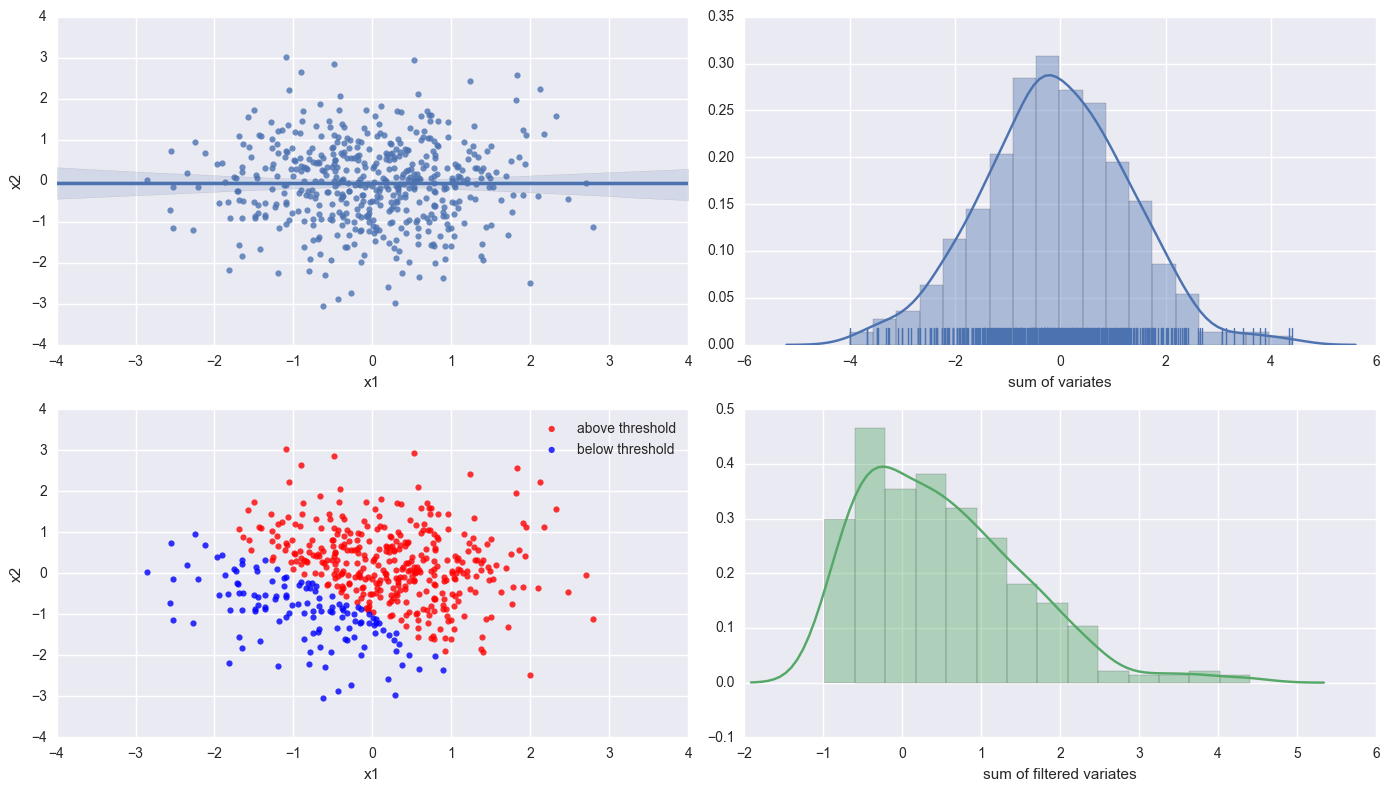

In [27]:

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=False)
sns.despine(left=True)

# sum of variates with no filter:

# plot of the bivariate:
sns.regplot(x="x1", y="x2", data=df,ax=axes[0,0]);
# Plot the sum of the two random variables:
df['sum_x1x2'] = df.x1+df.x2
sns.distplot(df['sum_x1x2'],bins=None, hist=True, kde=True, rug=True, color=None,
             axlabel='sum of variates', ax=axes[0,1] );

# sum of variates WITH filter:

# plot of the filtered bivariate:
df_in = df[df['sum_x1x2']>=-1.0]
sns.regplot(x="x1", y="x2", data=df_in,ax=axes[1,0], color ='red',fit_reg=False, label='above threshold' );
df_out = df[df['sum_x1x2']<-1.0]
sns.regplot(x="x1", y="x2", data=df_out,ax=axes[1,0], color ='blue',fit_reg=False, label='below threshold')
axes[1][0].legend(loc="best")
# Plot the sum of the two random variables, but now we filter by a specified threshold
y = np.array(filter(lambda a: a >= (-1.0), df['sum_x1x2'])) # 
sns.distplot(y, axlabel='sum of filtered variates', ax=axes[1,1]);

plt.tight_layout()

## Correlated Bivariate Truncation ##

We repeat the above, this time with rho of 0.75

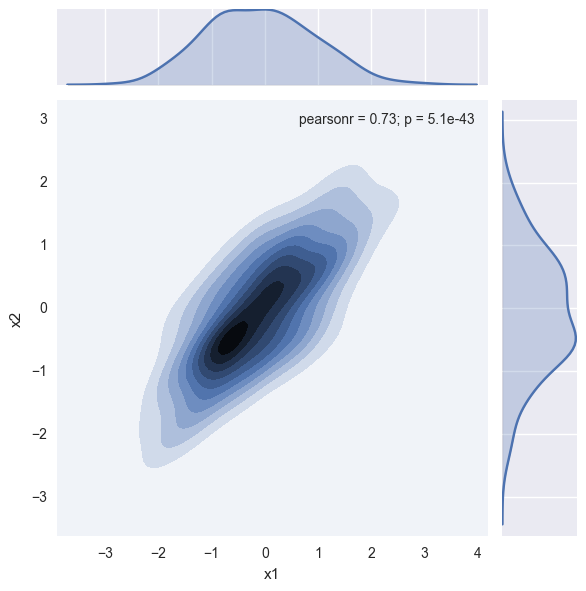

In [28]:
rho = 0.8
mean, cov = [0,0], [(1, rho), (rho, 1)]
sample_size = 250
data = np.random.multivariate_normal(mean, cov, sample_size)
df = pd.DataFrame(data, columns=["x1", "x2"])
sns.jointplot(x="x1", y="x2", data=df,kind="kde");

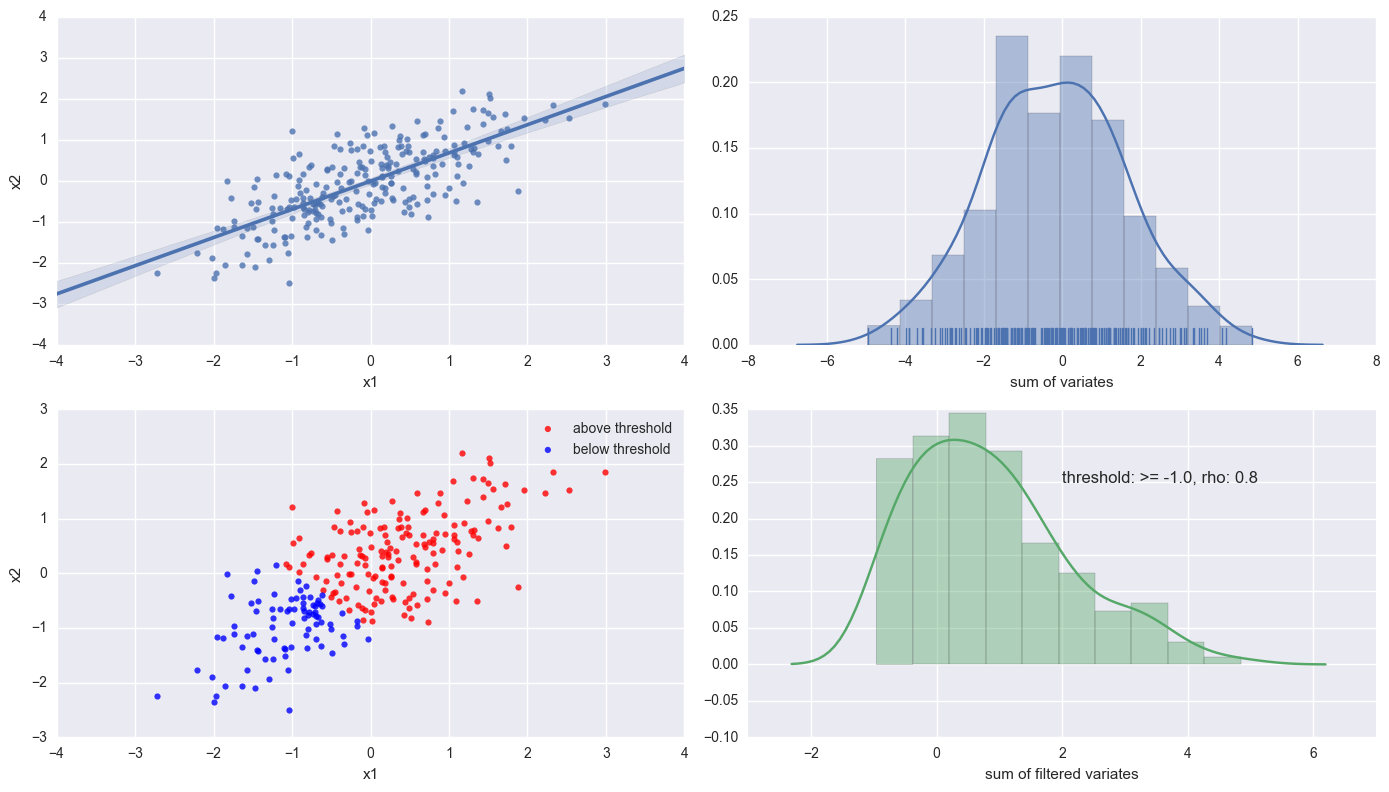

In [33]:

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=False)
sns.despine(left=True)

# sum of variates with no filter:

# plot of the bivariate:
sns.regplot(x="x1", y="x2", data=df,ax=axes[0,0]);
# Plot the sum of the two random variables:
df['sum_x1x2'] = df.x1+df.x2
sns.distplot(df['sum_x1x2'],bins=None, hist=True, kde=True, rug=True, color=None,
             axlabel='sum of variates', ax=axes[0,1] );

# sum of variates WITH filter:
th = -1.0
# plot of the filtered bivariate:
df_in = df[df['sum_x1x2']>=th]
sns.regplot(x="x1", y="x2", data=df_in,ax=axes[1,0], color ='red',fit_reg=False, label='above threshold' );
df_out = df[df['sum_x1x2']<th]
sns.regplot(x="x1", y="x2", data=df_out,ax=axes[1,0], color ='blue',fit_reg=False, label='below threshold')
axes[1][0].legend(loc="best")
# Plot the sum of the two random variables, but now we filter by a specified threshold
y = np.array(filter(lambda a: a >= th, df['sum_x1x2'])) # 
sns.distplot(y, axlabel='sum of filtered variates', ax=axes[1,1]);
#sns.set_title('density of a filtered normal r.v.',fontsize=16)
axes[1][1].annotate('threshold: >= {}, rho: {}'.format(th,rho), xy=(2, 0.25), fontsize=12)
plt.tight_layout()

To do:

1) Ovelay pdfs with different rho values  
2) Generate a map of statistics, and apply selection and see how the different distributions look like  
3) Monte Carlo simulations for sampling TMNs  
